In [42]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  Lasso, Ridge , LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, KFold,cross_val_predict
from sklearn.metrics import r2_score, f1_score,mean_squared_error
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer

## Data Exploration, Cleaning, Feature engineering 

In [99]:
file = 'insurance.csv'
data = pd.read_csv(file)

In [100]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

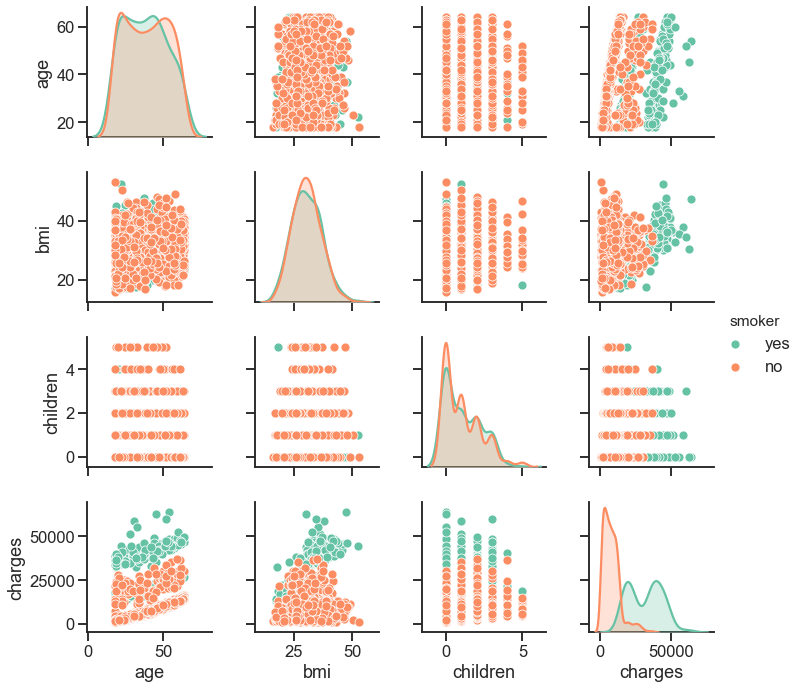

In [45]:
sns.pairplot(data=data,hue='smoker', kind='scatter', palette='Set2')

In [102]:
y=data.pop('charges')


## Normalising target 

In [103]:
X = data 

In [48]:
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=200)

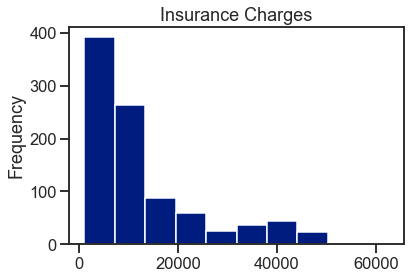

In [49]:
y_train.plot(kind='hist', title='Insurance Charges')

In [50]:
y_train.describe()

count      936.000000
mean     13046.395213
std      12081.817886
min       1121.873900
25%       4569.607650
50%       8931.509275
75%      16818.539955
max      62592.873090
Name: charges, dtype: float64

In [51]:
p_value=float(normaltest(y_train).pvalue)


In [52]:
y_train, lam = boxcox(y_train)

In [53]:
y_train=pd.DataFrame(y_train)
y_train.describe()
s=StandardScaler()
y_train=pd.DataFrame(s.fit_transform(y_train), columns=['charges'])

In [54]:
y_train.describe()

,charges
count,9.360000e+02
mean,-6.307870e-16
std,1.000535e+00
min,-2.223576e+00
25%,-7.117460e-01
50%,1.721343e-02
75%,7.101587e-01
max,2.163172e+00


In [55]:
print(f'{p_value:.15f}')

0.000000000000000


## Feature Engineering 

In [56]:
numeric_cols=list(X_train.dtypes[X_train.dtypes!=object].index)
categorical_cols=list(X_train.dtypes[X_train.dtypes==object].index)
s=StandardScaler()
X_train_s=pd.DataFrame(s.fit_transform(X_train[numeric_cols]), columns=['age', 'bmi','children'])
X_train_d=pd.get_dummies(X_train[categorical_cols], drop_first=True)
X_train=pd.concat([X_train_s.reset_index(), X_train_d.reset_index()], axis=1)

In [57]:
numeric_cols.append('charges')

In [59]:
data_aft = pd.concat([X_train,y_train], axis=1)

In [60]:
data_aft.describe()

,index,age,bmi,children,index,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
count,936.000000,9.360000e+02,9.360000e+02,9.360000e+02,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,9.360000e+02
mean,467.500000,1.833766e-16,-2.935686e-16,-1.192066e-16,667.798077,0.495726,0.199786,0.241453,0.270299,0.236111,-6.307870e-16
std,270.344225,1.000535e+00,1.000535e+00,1.000535e+00,391.790934,0.500249,0.400053,0.428193,0.444352,0.424918,1.000535e+00
min,0.000000,-1.515326e+00,-2.438063e+00,-9.047273e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.223576e+00
25%,233.750000,-8.570591e-01,-7.174596e-01,-9.047273e-01,316.500000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.117460e-01
50%,467.500000,-1.594092e-02,-5.489014e-02,-7.205793e-02,674.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.721343e-02
75%,701.250000,8.251773e-01,6.874369e-01,7.606114e-01,1004.500000,1.000000,0.000000,0.000000,1.000000,0.000000,7.101587e-01
max,935.000000,1.849147e+00,3.281220e+00,3.258620e+00,1337.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.163172e+00


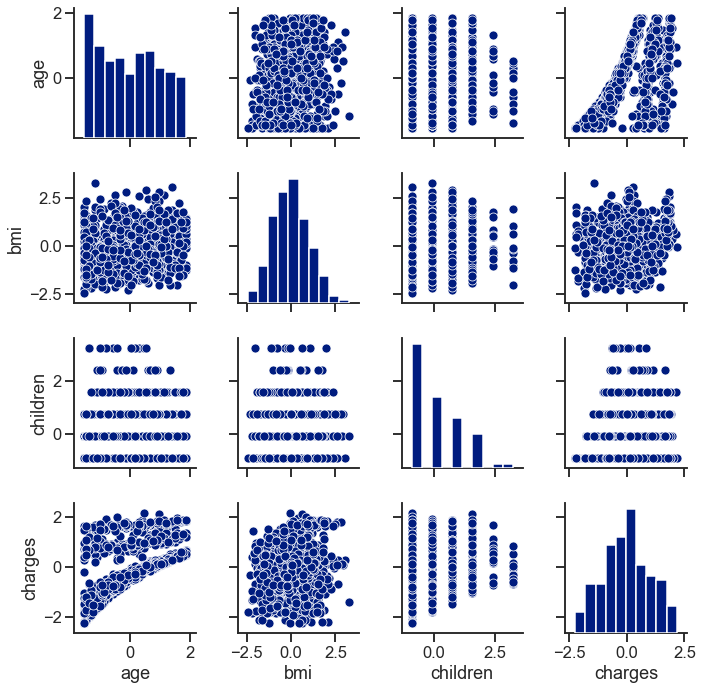

In [61]:
sns.pairplot(data=data_aft[numeric_cols], kind='scatter', palette='Set2')

## Model fitting

In [62]:
lr=LinearRegression()

In [63]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
pd.DataFrame(zip(list(X_train.columns),lr.coef_), columns=['variable', 'coef'])


,variable,coef
0,index,"[-2.2381787498612017e-05, 0.5123338317856841, ..."


In [65]:
numeric_cols=list(X_test.dtypes[X_test.dtypes!=object].index)
categorical_cols=list(X_test.dtypes[X_test.dtypes==object].index)
s=StandardScaler()
X_test_s=pd.DataFrame(s.fit_transform(X_test[numeric_cols]), columns=['age', 'bmi','children'])
X_test_d=pd.get_dummies(X_test[categorical_cols], drop_first=True)
X_test=pd.concat([X_test_s.reset_index(), X_test_d.reset_index()], axis=1)

In [66]:
y_pred=lr.predict(X_test)

In [67]:
r2_score(y_test, y_pred)

-1.2864544582020634

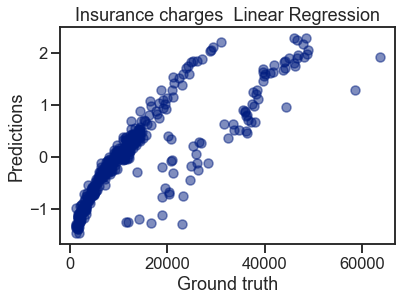

In [68]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Insurance charges  Linear Regression');


### Pipeline

In [104]:

    numeric_features = X_train.select_dtypes(exclude=object).columns

    s = StandardScaler()
    p = PolynomialFeatures(degree=3)
    l = LinearRegression()
    numeric_transformer = Pipeline([('scaler',s)
                    ,('pfes', p)
                     ])

    categorical_features = X.select_dtypes(include=object).columns
    X= pd.get_dummies(X, drop_first=True)

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ])

    # Append classifier to preprocessing pipeline.
    # Now we have a full prediction pipeline.
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', l)])


In [105]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True)),
                                                                  ('pfes',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_

In [106]:
clf.predict(X_test)

## Kfolds Cross Validation

In [107]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [108]:
pf = PolynomialFeatures(degree=2)

In [109]:
scores=[]
for train_index , test_index in kf.split(X):
     X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
     clf.fit(X_train, y_train)
     X_test_s=pd.DataFrame(numeric_transformer.fit(X_test))
     y_pred=clf.predict(X_test_s)
     score= r2_score(y_test,y_pred)
     scores.append(score)
     print(X_test)
    

ValueError: DataFrame constructor not properly called!

## Regularised models 

In [110]:
cvp=cross_val_predict(clf, X_test, y_test, cv = kf)

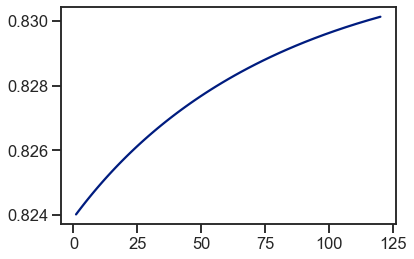

In [113]:
alphas = np.geomspace(1,120,120)
scores=[]
y= pd.DataFrame(y)
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)    
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', ridge)])
    
    
    predictions = cross_val_predict(clf, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

plt.plot(alphas, scores)

In [ ]:
alphas = np.geomspace(1,120,120)
scores=[]
y= pd.DataFrame(y)
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000)    
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', lasso)])
    
    
    predictions = cross_val_predict(clf, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

plt.plot(alphas, scores)

In [5]:
%pwd

'C:\\Users\\Lenovo'